### Question 1
<pre>
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address. 
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age 
Step 8. For each occupation present the percentage of women and men
</pre>

In [1]:
# Step 1. Import the necessary libraries 
import pandas as pd

In [2]:
#Step 2. Import the dataset from this address. 
#Step 3. Assign it to a variable called users
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|', index_col='user_id')
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [3]:
# Step 4. Discover what is the mean age per occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
# create a function to convert male to 1 
def male_to_one (x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
    
# Creating new column for male count using male_to_one function
users['gender_m'] = users['gender'].apply(male_to_one)


ratio = (users.groupby('occupation').gender_m.sum() / users.occupation.value_counts()) * 100 

# Showing the result from the most to the least 
ratio.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [5]:
#Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [6]:
# Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [7]:
#Step 8. For each occupation present the percentage of women and men
# counting the number of each gender by occupation
gender_by_occup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# Counting each occupation
occup_count = users.groupby(['occupation']).agg('count')


# Calculating percentage of women and men in each occupation
gender_per = gender_by_occup.div(occup_count, level = "occupation") * 100

# Showing the data of 'gender column'
gender_per.loc[: , 'gender']


occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

### Question 2
<pre>
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address 
Step 3. Assign it to a variable called euro12 
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012? 
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards 
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia
</pre>

In [8]:
pip install geonamescache

In [9]:
#Step 1. Import the necessary libraries
import numpy as np
import geonamescache

In [10]:
#Step 2. Import the dataset from this address 
#Step 3. Assign it to a variable called euro12 
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [11]:
#Step 4. Select only the Goal column
euro12.Goals


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
#Step 5. How many team participated in the Euro2012?
euro12.Team.nunique()

16

In [13]:
#Step 6. What is the number of columns in the dataset?
euro12.shape[1]

35

In [14]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [15]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards 
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [16]:
#Step 9. Calculate the mean Yellow Cards given per Team
print("Yellow Cards mean per Team \n",euro12["Yellow Cards"].mean())

Yellow Cards mean per Team 
 7.4375


In [17]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [18]:
#Step 11. Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [19]:
#Step 12. Select the first 7 columns
first_7_columns = euro12.iloc[:,0:7]
print("First 7 Columns \n",first_7_columns)

First 7 Columns 
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13              

In [20]:
#Step 13. Select all columns except the last 3
except_last3_columns = euro12.iloc[:,0:-3]
print("All coumns except the last 3 \n",except_last3_columns)

All coumns except the last 3 
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13 

In [21]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3
<pre>
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000 
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true? 
Step 7. Reindex the DataFrame so it goes from 0 to 299
</pre>

In [22]:
#Step 1. Import the necessary libraries
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000 

s1 = pd.Series(np.random.randint(1, 5, size = 100))
s2 = pd.Series(np.random.randint(1, 4, size = 100))
s3 = pd.Series(np.random.randint(10000, 30000, size = 100))
print(s1, s2, s3)

0     2
1     4
2     3
3     3
4     3
     ..
95    4
96    3
97    2
98    1
99    4
Length: 100, dtype: int32 0     3
1     1
2     2
3     1
4     3
     ..
95    3
96    1
97    2
98    1
99    1
Length: 100, dtype: int32 0     24076
1     18428
2     19924
3     10020
4     28240
      ...  
95    19741
96    24014
97    24323
98    11314
99    17225
Length: 100, dtype: int32


In [23]:
#Step 3. Create a DataFrame by joinning the Series by column
housing = pd.concat([s1, s2, s3], axis=1)
housing.head()

,0,1,2
0,2,3,24076
1,4,1,18428
2,3,2,19924
3,3,1,10020
4,3,3,28240


In [24]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
housing.head()

,bedrs,bathrs,price_sqr_meter
0,2,3,24076
1,4,1,18428
2,3,2,19924
3,3,1,10020
4,3,3,28240


In [25]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# concating the values
bigcolumn1 = pd.concat([s1, s2, s3], axis=0)
bigcolumn1

# Transforming to a DataFrame
bigcolumn = bigcolumn1.to_frame()
bigcolumn



,0
0,2
1,4
2,3
3,3
4,3
...,...
95,19741
96,24014
97,24323
98,11314


In [26]:
#Step 6. Ops it seems it is going only until index 99. Is it true? 
# No the index are kept but the length of the DataFrame is 300
len(bigcolumn)

300

In [27]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn


,0
0,2
1,4
2,3
3,3
4,3
...,...
295,19741
296,24014
297,24323
298,11314


### Question 4
<pre>
Wind Statistics
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location. 
Step 13. Downsample the record to a monthly frequency for each location. 
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for 
each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
</pre>

In [28]:
#Step 1. Import the necessary libraries
import datetime

In [29]:
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv('wind.txt', sep = "\s+", parse_dates = [[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [30]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
#function to fix year
def fix_year(x):
    year = x.year - 100 if x.year > 2060 else x.year
    return datetime.date(year, x.month, x.day)

#replacing the year with fix year
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_year)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [31]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
#transforming Yr_Mo_Dy to date type datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# setting 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()




,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [32]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [33]:
#Step 7. Compute how many non-missing values there are in total.
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [34]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
data.mean().mean()

10.227982360836924

In [35]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [36]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
# creating dataframe
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [37]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
data_jan = data[data.index.month == 1]
data_jan.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [38]:
#Step 12. Downsample the record to a yearly frequency for each location. 
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [39]:
#Step 13. Downsample the record to a monthly frequency for each location. 
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [40]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [41]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
data_weekly52 = data.resample('W').agg(['min', 'max', 'mean', 'std'])[:52]
data_weekly52

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46 

### Question 5
<pre>
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address. 
Step 3. Assign it to a variable called chipo. 
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset? 
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns. 
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column? 
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset? 
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order? 
Step 17. How many different items are sold?
</pre>

In [42]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address. 
#Step 3. Assign it to a variable called chipo. 
#Step 4. See the first 10 entries
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [43]:
#Step 5. What is the number of observations in the dataset?
num_obs = chipo.shape[0]
print("The number of observations in the dataset", num_obs)

The number of observations in the dataset 4622


In [44]:
#Step 6. What is the number of columns in the dataset?
columns = len(chipo.axes[1])
print("Number of Columns in the dataset: ", columns)

Number of Columns in the dataset:  5


In [45]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [46]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [47]:
#Step 9. Which was the most-ordered item?
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [48]:
#Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby('item_name')['quantity'].sum().max()

761

In [49]:
#Step 11. What was the most ordered item in the choice_description column? 
chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).head(1)

choice_description
[Diet Coke]    159
Name: quantity, dtype: int64

In [50]:
#Step 12. How many items were orderd in total?
chipo['quantity'].sum()

4972

In [51]:
#Step 13.
#• Turn the item price into a float
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [52]:
#Step 13.
#• Check the item price type
chipo.item_price.dtype

dtype('float64')

In [53]:
#Step 13.
#• Create a lambda function and change the type of item price
convert_item_price = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(convert_item_price)

TypeError: 'float' object is not subscriptable

In [56]:
#Step 13.
#• Check the item price type
chipo.item_price.dtype

dtype('float64')

In [57]:
#Step 14. How much was the revenue for the period in the dataset?
revenue =  (chipo.quantity * chipo.item_price).sum()
print('Revenue = $',revenue)

Revenue = $ 39237.02


In [58]:
#Step 15. How many orders were made in the period?
orders = chipo.order_id.value_counts().count()
orders

1834

In [59]:
#Step 16. What is the average revenue amount per order?
average_revenue_amount = revenue / orders
average_revenue_amount

21.39423118865867

In [60]:
#Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

### Question 6
<pre>
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!
</pre>

In [61]:
us_marriage_divorce_data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
us_marriage_divorce_data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


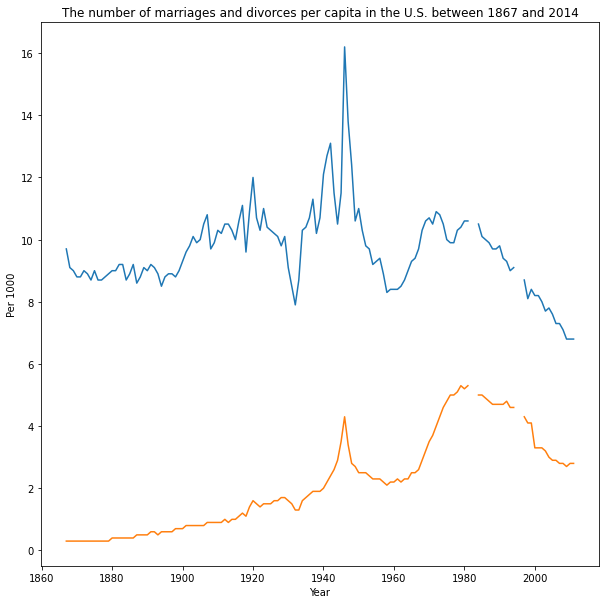

In [62]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(10,10))

plt.plot(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Marriages_per_1000'])
plt.plot(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Divorces_per_1000'])
plt.title('The number of marriages and divorces per capita in the U.S. between 1867 and 2014')
plt.xlabel('Year')
plt.ylabel('Per 1000')
plt.show()

### Question 7
<pre>
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, 
and 2000. Don't forget to label your axes!
</pre>

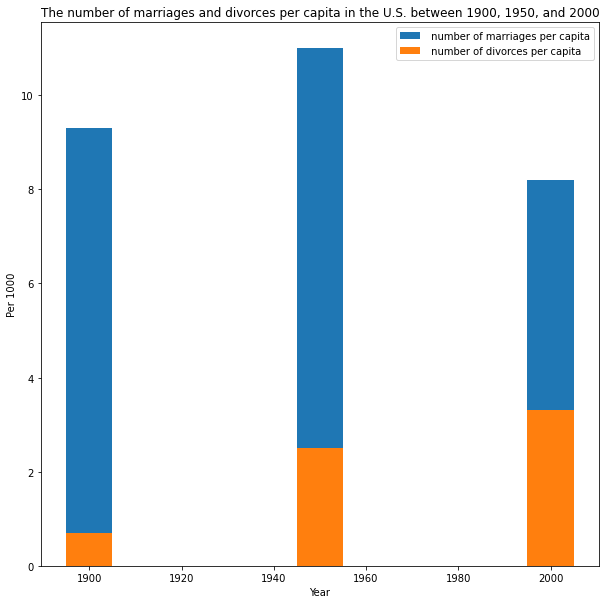

In [63]:
import matplotlib.pyplot as plt

us_marriage_divorce_data1 = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data1['Year'].values
marriages_per_capita = us_marriage_divorce_data1['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data1['Divorces_per_1000'].values

fig= plt.figure(figsize=(10,10))
plt.bar(us_marriage_divorce_data1['Year'], us_marriage_divorce_data1['Marriages_per_1000'], width=10, label=" number of marriages per capita")
plt.bar(us_marriage_divorce_data1['Year'], us_marriage_divorce_data1['Divorces_per_1000'], width=10, label=" number of divorces per capita")

plt.legend()
plt.title('The number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000')
plt.xlabel('Year')
plt.ylabel('Per 1000')
plt.show()





### Question 8
<pre>
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and 
label each bar with the corresponding actor's name. Don't forget to label your axes!
</pre>

In [64]:
actors_kill_count = pd.read_csv(r'actor_kill_counts.csv')
actors_kill_count.head()


,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


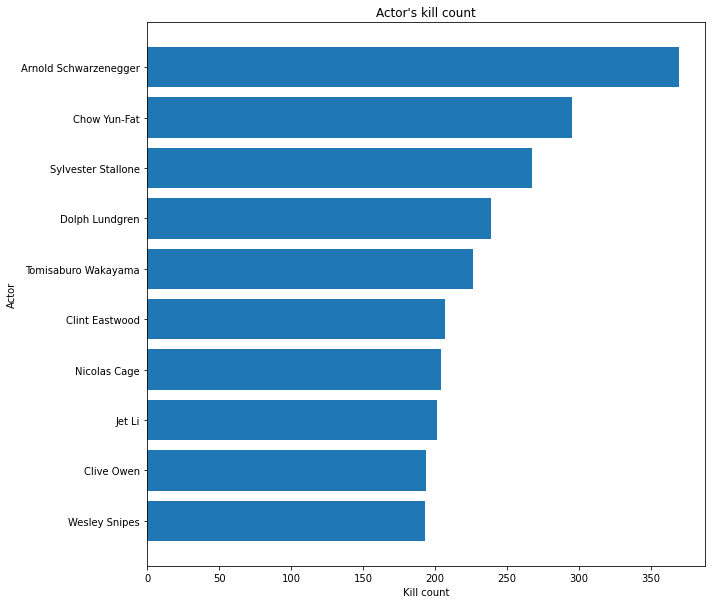

In [65]:
fig= plt.figure(figsize=(10,10))
a1 = actors_kill_count.sort_values('Count', ascending=True)
plt.barh(a1['Actor'], a1['Count'])
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.show()

### Question 9
<pre>
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the 
categories.
</pre>

In [66]:
roman_emperors = pd.read_csv(r'roman-emperor-reigns.csv')
roman_emperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [67]:
assassinated_emperors = roman_emperors[roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
print(assassinated_emperors)
number_assassinated = len(assassinated_emperors)
print(number_assassinated)


               Emperor  Length_of_Reign         Cause_of_Death
0             Augustus            40.58  Possibly assassinated
1             Tiberius            22.50  Possibly assassinated
2             Caligula             4.83           Assassinated
3             Claudius            13.75  Possibly assassinated
5                Galba             0.58           Assassinated
7            Vitellius             0.67           Assassinated
10            Domitian            15.00           Assassinated
17            Commodus            15.00           Assassinated
18            Pertinax             0.25           Assassinated
21           Caracalla            19.00           Assassinated
22                Geta             3.00           Assassinated
24          Elagabalus             3.75           Assassinated
25   Severus Alexander            13.00           Assassinated
26         Maximinus I             3.25           Assassinated
29            Pupienus             0.25           Assas

In [68]:
other_deaths = len(roman_emperors) - number_assassinated
print(other_deaths)

38


([<matplotlib.patches.Wedge at 0x1d117d91340>,
 [Text(5.388445916248355e-16, 8.8, 'Augustus'),
  Text(-0.06355350556839466, 8.799770505639904, 'Tiberius'),
  Text(-0.25418087519481225, 8.796328329631928, 'Caligula'),
  Text(-0.5715838525916983, 8.781417419725386, 'Claudius'),
  Text(-1.014603498093826, 8.741314531674043, 'Galba'),
  Text(-1.5802330760233507, 8.656954627664499, 'Vitellius'),
  Text(-2.2622567580796455, 8.504245666755105, 'Domitian'),
  Text(-3.0495563976684283, 8.254708097651882, 'Commodus'),
  Text(-3.924170701120674, 7.876603602344484, 'Pertinax'),
  Text(-4.859253435988567, 7.336733336085844, 'Caracalla'),
  Text(-5.817160387583082, 6.6030784506269695, 'Geta'),
  Text(-6.747994822848904, 5.648412685950311, 'Elagabalus'),
  Text(-7.589048035193822, 4.454924232747489, 'Severus Alexander'),
  Text(-8.265666264955097, 3.0197286627084967, 'Maximinus I'),
  Text(-8.694128733123023, 1.3609282023254161, 'Pupienus'),
  Text(-8.787094044773891, -0.4764223423594041, 'Balbinus')

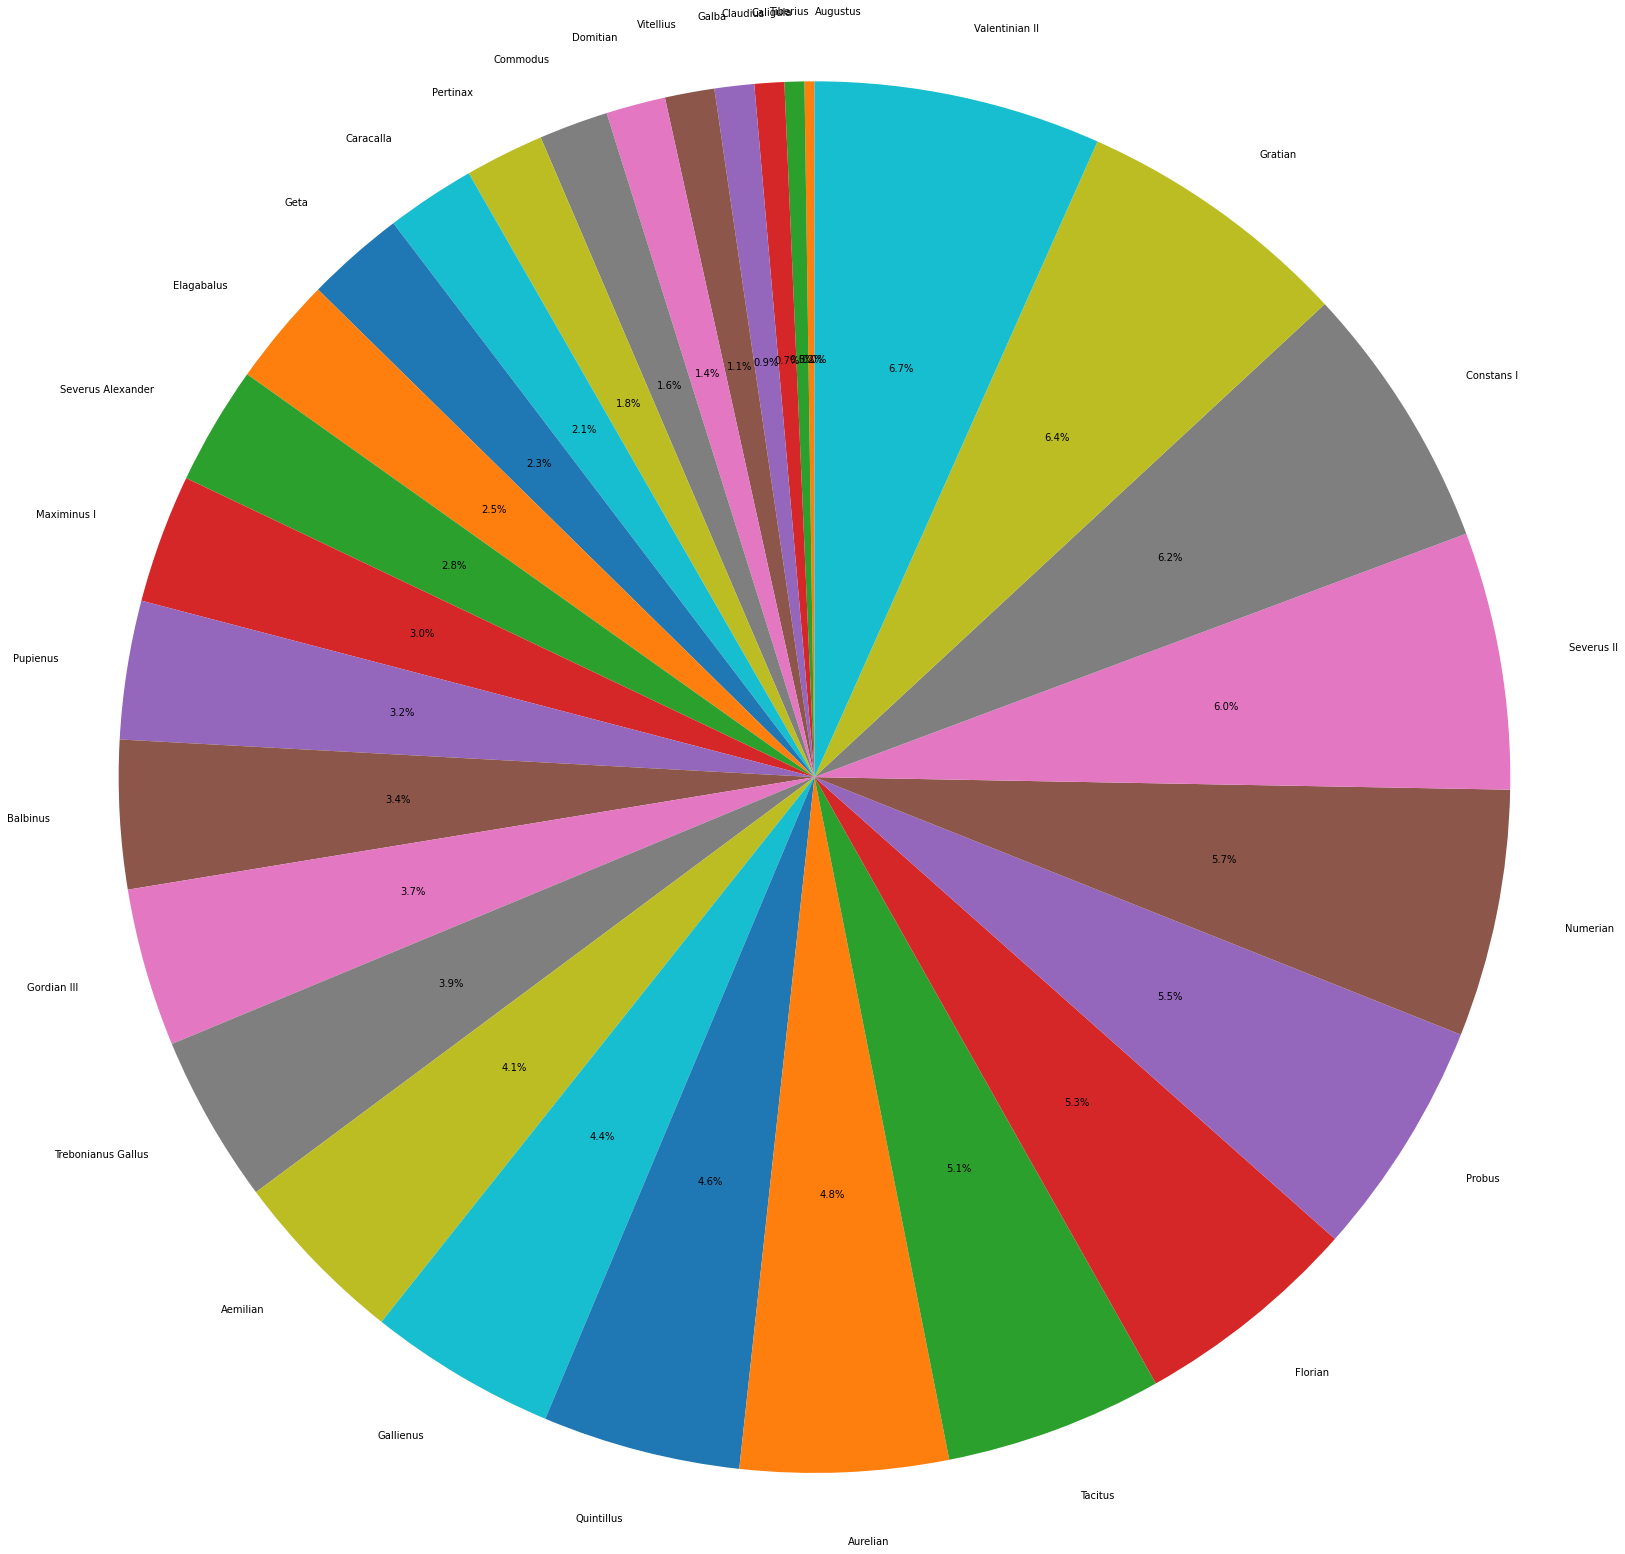

In [69]:
emperor = assassinated_emperors["Emperor"]
cause_of_death = assassinated_emperors["Cause_of_Death"]
plt.pie(range(len(cause_of_death)), labels=emperor,autopct='%1.1f%%', startangle=90, radius=0.08 * 100)

### Question 10
<pre>
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer 
Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.
</pre>

In [70]:
reln_rev_phds = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
reln_rev_phds

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


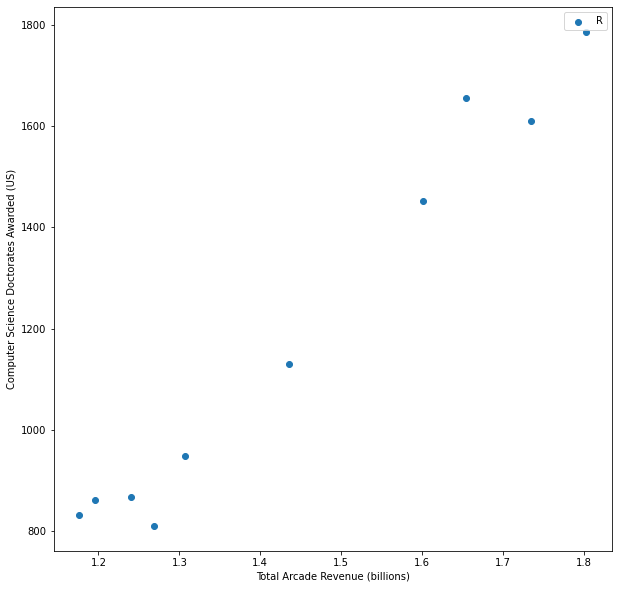

In [71]:
groups = reln_rev_phds.groupby('Year')

arcade_revenue = reln_rev_phds['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = reln_rev_phds['Computer Science Doctorates Awarded (US)'].values
fig= plt.figure(figsize=(10,10))
plt.scatter(arcade_revenue,cs_doctorates_awarded)

plt.legend("Relationship between the total revenue earned")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.show()
